<a href="https://colab.research.google.com/github/lilia-sanchez/Bio125/blob/main/Lab9_multiple_fatigability_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

### Read the right hand data

In [6]:
dfr = pd.read_csv (r'./TAMMYEXP1.txt', sep = '\t')
dfr

,Time,EMG,Muscle Force
0,0.000,0.00000,0.276933
1,0.001,0.00000,0.276933
2,0.002,0.00000,0.276933
3,0.003,0.00000,0.276933
4,0.004,0.00000,0.276933
...,...,...,...
43899,43.899,10.52620,0.277308
43900,43.900,-13.62650,0.277308
43901,43.901,2.06573,0.277308
43902,43.902,-2.36782,0.277308


### Read the left hand data

In [7]:
dfl = pd.read_csv (r'./TAMMYEXP2_Export.txt', sep = '\t')
dfl

,Time,EMG,Muscle Force
0,0.000,0.00000,0.277683
1,0.001,0.00000,0.277683
2,0.002,0.00000,0.277683
3,0.003,0.00000,0.277683
4,0.004,0.00000,0.277683
...,...,...,...
32090,32.090,-4.22700,0.278060
32091,32.091,-6.48159,0.277683
32092,32.092,11.99310,0.278060
32093,32.093,-6.02346,0.277683


### Graph the raw data (EMG and Time)

Text(0, 0.5, 'EMG (Volts)')

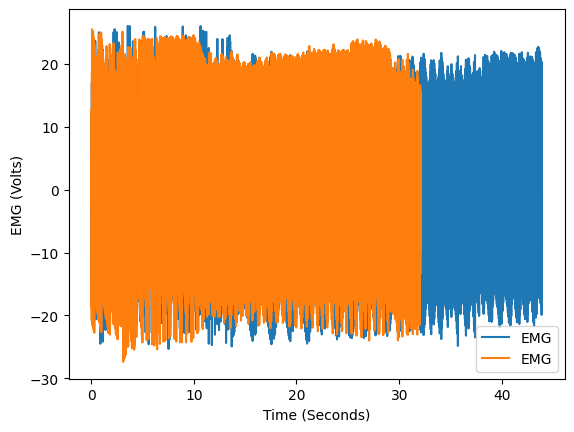

In [8]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

### Decide how you want to analyze the data...

In [9]:
# Define the parameters
window_size = 10  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10 # Step size in seconds (how often you want to check the window size)


### Run the code that will perform the analysis and display results at bottom

In [10]:
# Initialize lists to store the calculated max values
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []

# Iterate through the data in steps for dfr
for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfr
result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})

# Iterate through the data in steps for dfl
for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfl
result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})

# Calculate the percentage of max EMG for each 0.5 seconds interval for both dfr and dfl
result_df_r['MaxEMG_percent_R'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_L'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100

# Display the results
print(result_df_r)
print(result_df_l)

      Time  MaxEMG_R  MaxEMG_percent_R
0   4.9995   25.9883        100.000000
1  14.9995   25.9642         99.907266
2  24.9995   21.9019         84.276001
3  34.9995   22.0161         84.715430
      Time  MaxEMG_L  MaxEMG_percent_L
0   4.9995   25.4612        100.000000
1  14.9995   24.0828         94.586272
2  24.9995   23.8393         93.629915


### Set a threshold of Max_EMG_percent for fatigability determination (what % of max is considered fatigued)

In [16]:
threshold = 94

### Calculate when 'MaxEMG_percent' reaches approximately threshold

In [17]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_R'] <= threshold]
time_at_threshold_R = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_L'] <= threshold]
time_at_threshold_L = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for right hand: {time_at_threshold_R} seconds")
print(f"Time at ~{threshold} % of max for left hand: {time_at_threshold_L} seconds")

Time at ~94 % of max for right hand: 24.9995 seconds
Time at ~94 % of max for left hand: 24.9995 seconds


### Graph the EMG data including when it reaches fatigability threshold

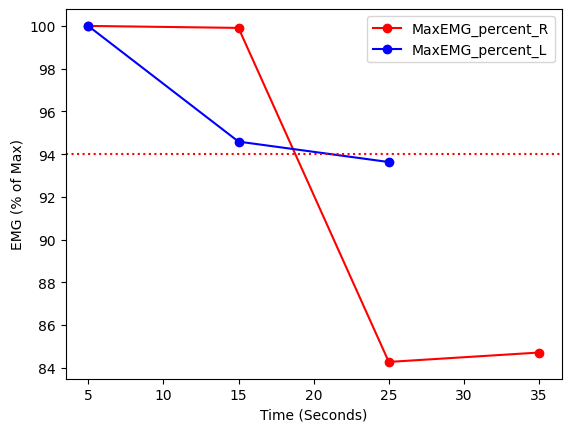

In [18]:
fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_R', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_L', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

### Graph Left vs Right as an n of 1 (no error bars)

Text(0.5, 1.0, 'Fatigability Assay - Right vs Left Hand')

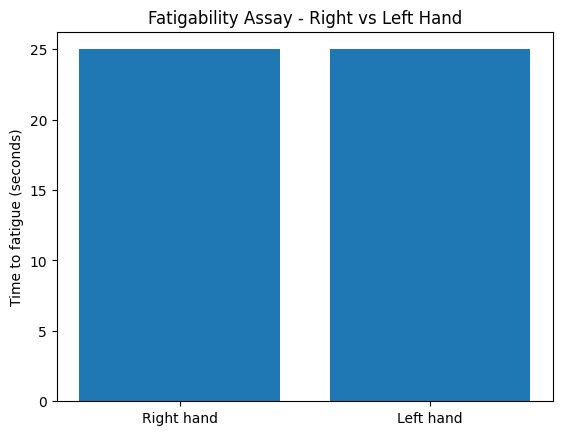

In [19]:
# build a bar plot
plt.bar(['Right hand', 'Left hand'],[time_at_threshold_R, time_at_threshold_L])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - Right vs Left Hand')